In [1]:
# pip install future
from __future__ import (absolute_import, division, print_function, unicode_literals)
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# будем отображать графики прямо в jupyter'e
%pylab inline

# увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Загрузим в dataframe данные, с которыми будем работать. 
# Для примеров я выбрала данные о продажах и оценках видео-игр из Kaggle Datasets
# https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings/data 

df = pd.read_csv('C:/Users/WhiteKisa/Desktop/Python_Sripts/DataSets/Video_Games_Sales_as_at_22_Dec_2016.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         10015 non-null object
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [3]:
# Данные об оценках есть не для всех фильмов, поэтому давайте оставим только те записи, 
# в которых нет пропусков с помощью метода dropna.

df = df.dropna()
print(df.shape)

(6825, 16)


In [4]:
# Всего в таблице 6825 объектов и 16 признаков для них. 
# Посмотрим на несколько первых записей c помощью метода head, чтобы убедиться, что все распарсилось правильно. 
# Для удобства я оставила только те признаки, которые мы будем в дальнейшем использовать.

In [5]:
useful_cols = ['Name', 'Platform', 'Year_of_Release', 'Genre', 'Global_Sales', 'Critic_Score', 'Critic_Count',
               'User_Score', 'User_Count', 'Rating']

In [6]:
df[useful_cols].head()

,Name,Platform,Year_of_Release,Genre,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006.0,Sports,82.53,76.0,51.0,8,322.0,E
2,Mario Kart Wii,Wii,2008.0,Racing,35.52,82.0,73.0,8.3,709.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,32.77,80.0,73.0,8,192.0,E
6,New Super Mario Bros.,DS,2006.0,Platform,29.80,89.0,65.0,8.5,431.0,E
7,Wii Play,Wii,2006.0,Misc,28.92,58.0,41.0,6.6,129.0,E


In [7]:
# Прежде чем мы перейдем к рассмотрению методов библиотек seaborn и plotly, 
# обсудим самый простой и зачастую удобный способ визуализировать данные из pandas dataframe 
# — это воспользоваться функцией plot.
# Для примера построим график продаж видео игр в различных странах в зависимости от года. 
# Для начала отфильтруем только нужные нам столбцы, затем посчитаем суммарные продажи по годам 
# и у получившегося dataframe вызовем функцию plot без параметров.

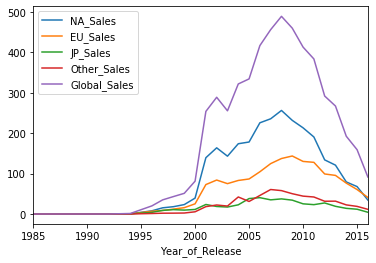

In [8]:
sales_df = df[[x for x in df.columns if 'Sales' in x] + ['Year_of_Release']]
sales_df.groupby('Year_of_Release').sum().plot()

# Реализация функции plot в pandas основана на библиотеке matplotlib.


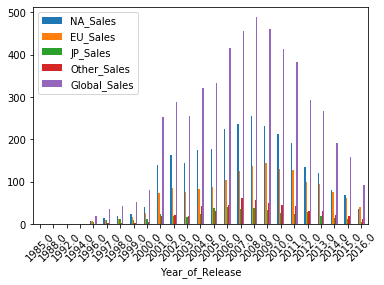

In [9]:
# C помощью параметра kind можно изменить тип графика, например, на bar chart. 
# Matplotlib позволяет очень гибко настраивать графики. 
# На графике можно изменить почти все, что угодно, но потребуется изучить документацию и найти нужные параметры. 
# Например, параметра rot отвечает за угол наклона подписей к оси x.

sales_df.groupby('Year_of_Release').sum().plot(kind='bar', rot=45)

In [10]:
# Seaborn

# Перейдем к библиотеке seaborn. Seaborn — это по сути более высокоуровневое API на базе библиотеки matplotlib. 
# Seaborn содержит более адекватные дефолтные настройки оформления графиков. 
# Если просто добавить в код import seaborn, то картинки станут гораздо симпатичнее. 
# Также в библиотеке есть достаточно сложные типы визуализации, которые в matplotlib потребовали бы большого количество кода.


# Познакомимся с первым таким "сложным" типом графиков pair plot (scatter plot matrix). 
# Эта визуализация поможет нам посмотреть на одной картинке, как связаны между собой различные признаки.

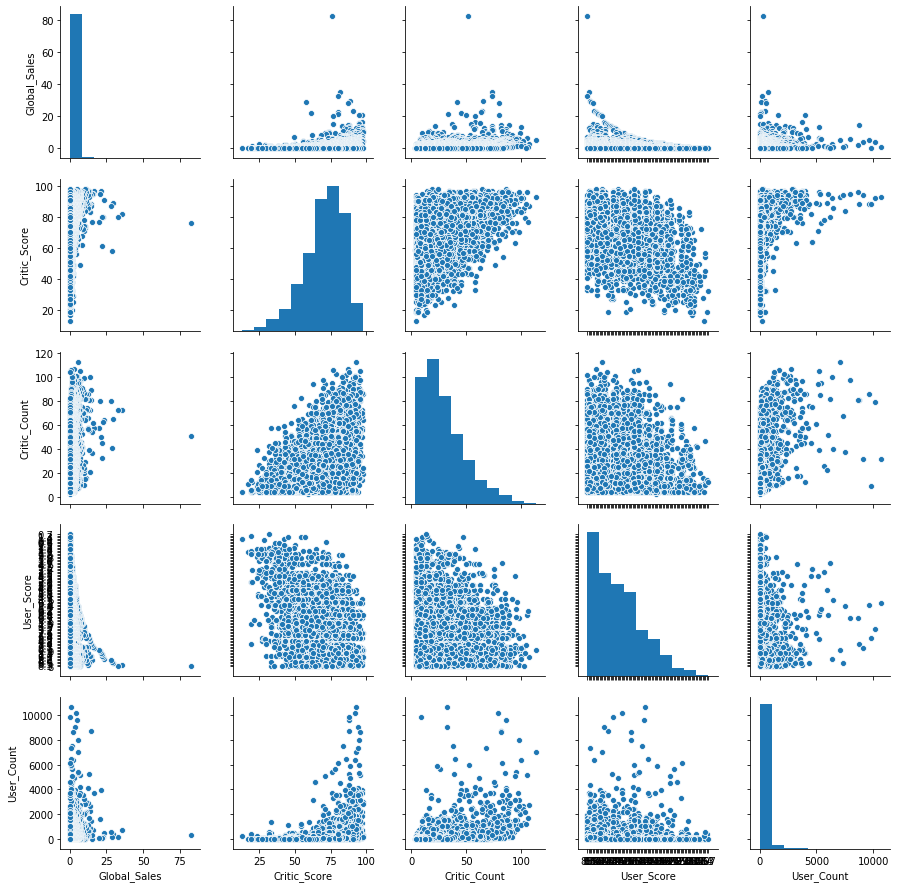

In [11]:
cols = ['Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']
sns_plot = sns.pairplot(df[cols])
sns_plot.savefig('pairplot.png')

# Как можно видеть, на диагонали матрицы графиков расположены гистограммы распределений признака. 
# Остальные же графики — это обычные scatter plots для соответствующих пар признаков.
# Для сохранения графиков в файлы стоит использовать метод savefig.

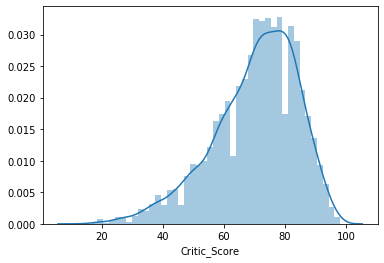

In [12]:
# С помощью seaborn можно построить и распределение dist plot. 
# Для примера посмотрим на распределение оценок критиков Critic_Score. 
# По умолчанию на графике отображается гистограмма и kernel density estimation.
# https://www.youtube.com/watch?v=L5qPhDL4JAQ

sns.distplot(df.Critic_Score)


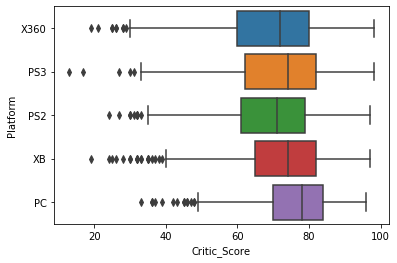

In [13]:
# Еще один полезный тип графиков — это box plot. 
# Давайте сравним оценки игр от критиков для топ-5 крупнейших игровых платформ.


top_platforms = df.Platform.value_counts().sort_values(ascending = False).head(5).index.values
sns.boxplot(y="Platform", x="Critic_Score", data=df[df.Platform.isin(top_platforms)], orient="h")

In [14]:
# Немного подробнее, как же понимать box plot. 
# Box plot состоит из коробки (поэтому он и называется box plot), усиков и точек. 
# Коробка показывает интерквартильный размах распределения, то есть соответственно 25% (Q1) и 75% (Q3) перцентили. 
# Черта внутри коробки обозначает медиану распределения.
# Усы отображают весь разброс точек кроме выбросов, то есть минимальные и максимальные значения, 
# которые попадают в промежуток (Q1 - 1.5*IQR, Q3 + 1.5*IQR), где IQR = Q3 - Q1 — интерквартильный размах. 
# Точками на графике обозначаются выбросы (outliers) — те значения, которые не вписываются в промежуток значений, 
# заданный усами графика.

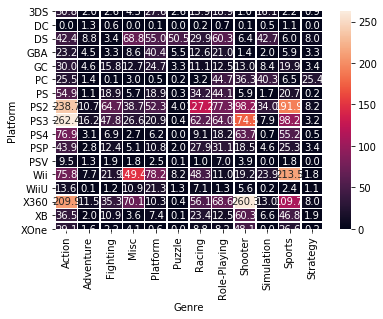

In [15]:
# И еще один тип графиков — это heat map. 
# Heat map позволяет посмотреть на распределение какого-то численного признака по двум категориальным. 
# Визуализируем суммарные продажи игр по жанрам и игровым платформам.

platform_genre_sales = df.pivot_table(
                        index='Platform', 
                        columns='Genre', 
                        values='Global_Sales', 
                        aggfunc=sum).fillna(0).applymap(float)
sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", linewidths=.5)

In [16]:
# Plotly

# Мы рассмотрели визуализации на базе библиотеки matplotlib. 
# Однако это не единственная опция для построения графиков на языке python. 
# Познакомимся также с библиотекой plotly. 
# Plotly — это open-source библиотека, которая позволяет строить интерактивные графики в jupyter.notebook'e 
# без необходимости зарываться в javascript код.

# Прелесть интерактивных графиков заключается в том, что можно посмотреть точное численное значение 
# при наведении мыши, скрыть неинтересные ряды в визуализации, приблизить определенный участок графика и т.д.

In [17]:
# pip install plotly

In [18]:
# Перед началом работы импортируем все необходимые модули и инициализируем plotly с помощью команды init_notebook_mode.

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [19]:
# Для начала построим line plot с динамикой числа вышедших игр и их продаж по годам.

# посчитаем число вышедших игр и проданных копий по годам
years_df = df.groupby('Year_of_Release')[['Global_Sales']].sum().join(
    df.groupby('Year_of_Release')[['Name']].count()
)
years_df.columns = ['Global_Sales', 'Number_of_Games']

In [20]:
# создаем линию для числа проданных копий
trace0 = go.Scatter(
    x=years_df.index,
    y=years_df.Global_Sales,
    name='Global Sales'
)

In [21]:
# создаем линию для числа вышедших игр 
trace1 = go.Scatter(
    x=years_df.index,
    y=years_df.Number_of_Games,
    name='Number of games released'
)

In [22]:
# определяем массив данных и задаем title графика в layout
data = [trace0, trace1]
layout = {'title': 'Statistics of video games'}


In [23]:
# cоздаем объект Figure и визуализируем его
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

# В plotly строится визуализация объекта Figure, который состоит из данных (массив линий, которые 
# в библиотеке называются traces) и оформления/стиля, за который отвечает объект layout. 
# В простых случаях можно вызывать функцию iplot и просто от массива traces.


In [24]:
# Можно сразу сохранить график в виде html-файла.

plotly.offline.plot(fig, filename='years_stats.html', show_link=False)


'years_stats.html'

In [25]:
# Посмотрим также на рыночную долю игровых платформ, рассчитанную по количеству выпущенных игр и по суммарной выручке. 
# Для этого построим bar chart.

# считаем число проданных и вышедших игр по платформам
platforms_df = df.groupby('Platform')[['Global_Sales']].sum().join(
    df.groupby('Platform')[['Name']].count()
)
platforms_df.columns = ['Global_Sales', 'Number_of_Games']
platforms_df.sort_values('Global_Sales', ascending=False, inplace=True)


In [26]:
# создаем traces для визуализации
trace0 = go.Bar(
    x=platforms_df.index,
    y=platforms_df.Global_Sales,
    name='Global Sales'
)

trace1 = go.Bar(
    x=platforms_df.index,
    y=platforms_df.Number_of_Games,
    name='Number of games released'
)

In [27]:
# создаем массив с данными и задаем title для графика и оси x в layout
data = [trace0, trace1]
layout = {'title': 'Share of platforms', 'xaxis': {'title': 'platform'}}


In [28]:
# создаем объект Figure и визуализируем его
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

In [29]:
# В plotly можно построить и box plot. Рассмотрим распределения оценок критиков в зависимости от жанра игры.

In [30]:
# создаем Box trace для каждого жанра из наших данных
data = []
for genre in df.Genre.unique():
    data.append(
        go.Box(y=df[df.Genre==genre].Critic_Score, name=genre)
    )

# визуализируем данные
iplot(data, show_link = False)

In [31]:
# С помощью plotly можно построить и другие типы визуализаций. Графики получаются достаточно симпатичными с дефолтными 
# настройками. Однако библиотека позволяет и гибко настраивать различные параметры визуализации: цвета, шрифты, подписи, 
# аннотации и многое другое.


In [32]:
# Пример визуального анализа данных

In [33]:
# Считываем в DataFrame данные по оттоку клиентов телеком-оператора.

df = pd.read_csv('C:/Users/WhiteKisa/Desktop/Python_Sripts/DataSets/telecom.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64

In [34]:
# Проверим, все ли нормально считалось – посмотрим на первые 5 строк (метод head).

df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [35]:
# Число строк (клиентов) и столбцов (признаков):
df.shape

(3333, 21)

In [36]:
# Посмотрим на признаки и убедимся, что пропусков ни в одном из них нет – везде по 3333 записи.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64

In [37]:
# Описание признаков
# Название					Описание										Тип
# State						Буквенный код штата								номинальный
# Account length			Как долго клиент обслуживается компанией		количественный
# Area code					Префикс номера телефона							количественный
# International plan		Международный роуминг (подключен/не подключен)	бинарный
# Voice mail plan			Голосовая почта (подключена/не подключена)		бинарный
# Number vmail messages		Количество голосовых сообщений					количественный
# Total day minutes			Общая длительность разговоров днем				количественный
# Total day calls			Общее количество звонков днем					количественный
# Total day charge			Общая сумма оплаты за услуги днем				количественный
# Total eve minutes			Общая длительность разговоров вечером			количественный
# Total eve calls			Общее количество звонков вечером				количественный
# Total eve charge			Общая сумма оплаты за услуги вечером			количественный
# Total night minutes		Общая длительность разговоров ночью				количественный
# Total night calls			Общее количество звонков ночью					количественный
# Total night charge		Общая сумма оплаты за услуги ночью				количественный
# Total intl minutes		Общая длительность международных разговоров		количественный
# Total intl calls			Общее количество международных разговоров		количественный
# Total intl charge			Общая сумма оплаты за международные разговоры	количественный
# Customer service calls	Число обращений в сервисный центр				количественный

# Целевая переменная: Churn – Признак оттока, бинарный (1 – потеря клиента, то есть отток). 

In [38]:
# Посмотрим на распределение целевого класса – оттока клиентов.

df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

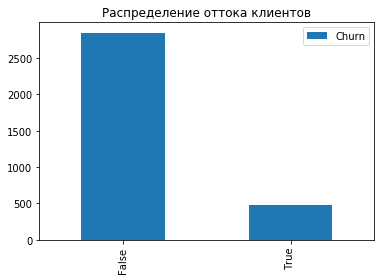

In [39]:
df['churn'].value_counts().plot(kind='bar', label='Churn')
plt.legend()
plt.title('Распределение оттока клиентов');

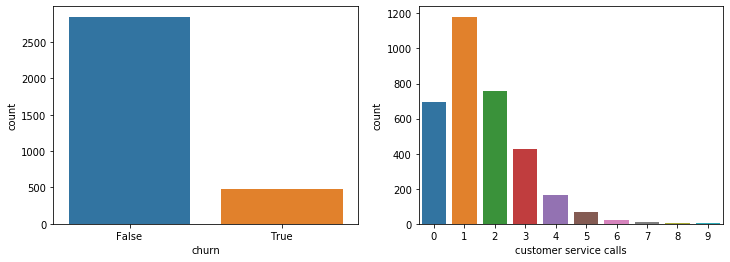

In [40]:
# Гистограмма представляет собой графическое представление таблицы частот. 
# Самый простой способ создать его - использовать функцию countplot () для seaborn. 

_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
sns.countplot(x='churn', data=df, ax=axes[0]);
sns.countplot(x='customer service calls', data=df, ax=axes[1]);

In [41]:
# Выделим следующие группы признаков (среди всех кроме Churn ):

# бинарные: International plan, Voice mail plan
# категориальные: State
# порядковые: Customer service calls
# количественные: все остальные

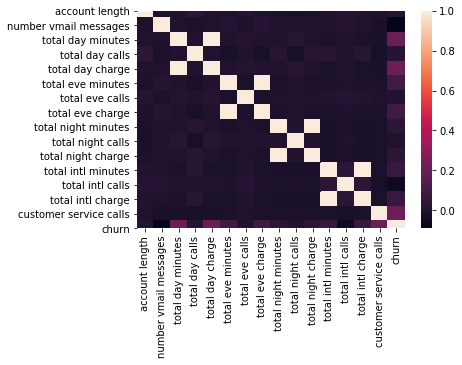

In [42]:
# Посмотрим на корреляции количественных признаков. 
# По раскрашенной матрице корреляций видно, что такие признаки как Total day charge 
# считаются по проговоренным минутам (Total day minutes). 
# То есть 4 признака можно выкинуть, они не несут полезной информации.

corr_matrix = df.drop(['state', 'international plan', 'voice mail plan',
                      'area code'], axis=1).corr()
sns.heatmap(corr_matrix);


In [43]:
# Диаграмма рассеяния отображает значения двух числовых переменных в виде декартовых координат в двумерном пространстве. 
# Разброс графиков в 3D также возможны.
# Давайте попробуем использовать функцию scatter () из библиотеки matplotlib:

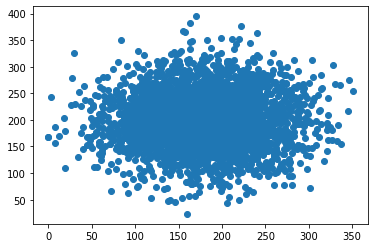

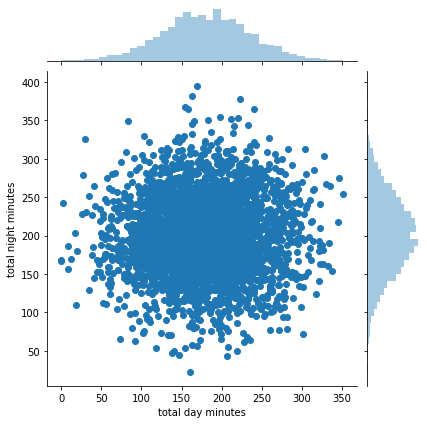

In [44]:
plt.scatter(df['total day minutes'], df['total night minutes']);
sns.jointplot(x='total day minutes', y='total night minutes',
              data=df, kind='scatter');

In [45]:
# Функция jointplot () отображает две гистограммы, которые могут быть полезны в некоторых случаях. 
# Используя ту же функцию, мы также можем получить сглаженную версию нашего двумерного массива:

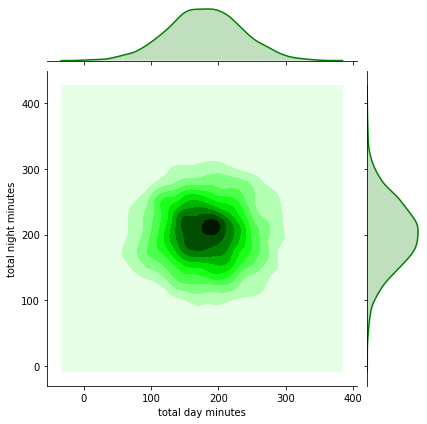

In [46]:
sns.jointplot('total day minutes', 'total night minutes',
              data=df, kind="kde", color="g");

In [47]:
# Теперь посмотрим на распределения всех интересующих нас количественных признаков. 
# На бинарные/категориальные/порядковые признакие будем смотреть отдельно.

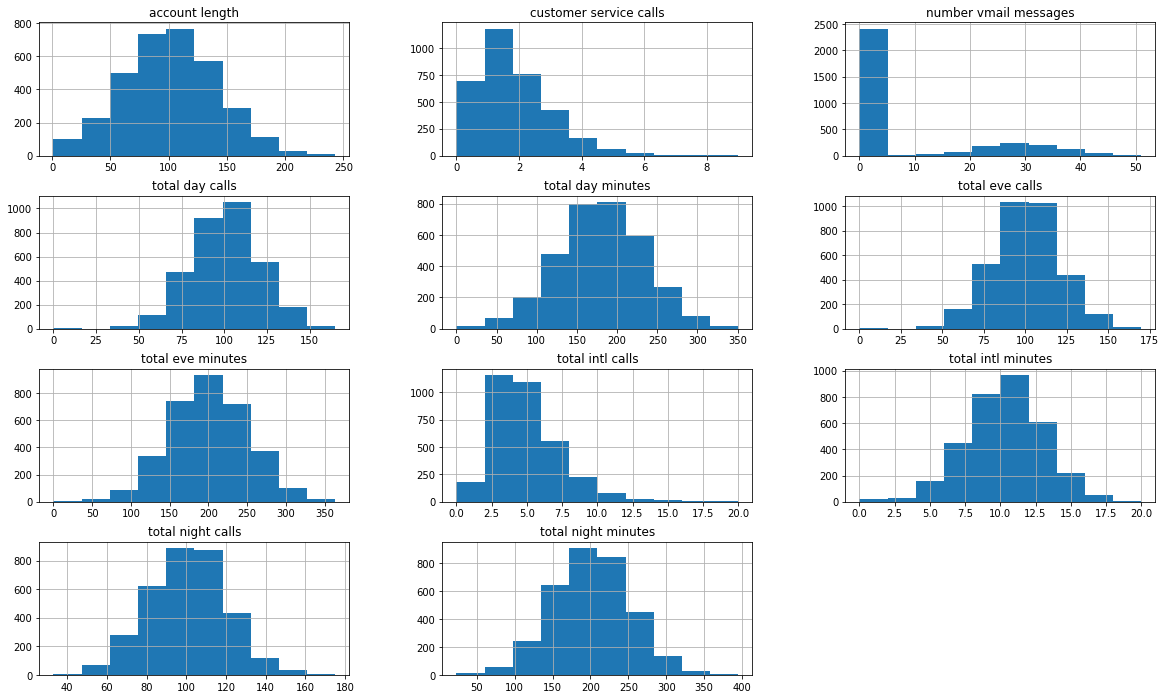

In [48]:
features = list(set(df.columns) - set(['state', 'international plan', 'voice mail plan',  'area code',
                                      'total day charge',   'total eve charge',   'total night charge',
                                        'total intl charge', 'churn', 'phone number']))

df[features].hist(figsize=(20,12));

In [49]:
# Видим, что большинство признаков распределены нормально. 
# Исключения – число звонков в сервисный центр (Customer service calls) (тут больше подходит пуассоновское распределение) 
# и число голосовых сообщений (Number vmail messages, пик в нуле, т.е. это те, у кого голосовая почта не подключена). 
# Также смещено распределение числа международных звонков (Total intl calls).

In [50]:
# Еще полезно строить вот такие картинки, где на главной диагонали рисуются распредления признаков, 
# а вне главной диагонали – диаграммы рассеяния для пар признаков. 
# Бывает, что это приводит к каким-то выводам, но в данном случае все примерно понятно, без сюрпризов.

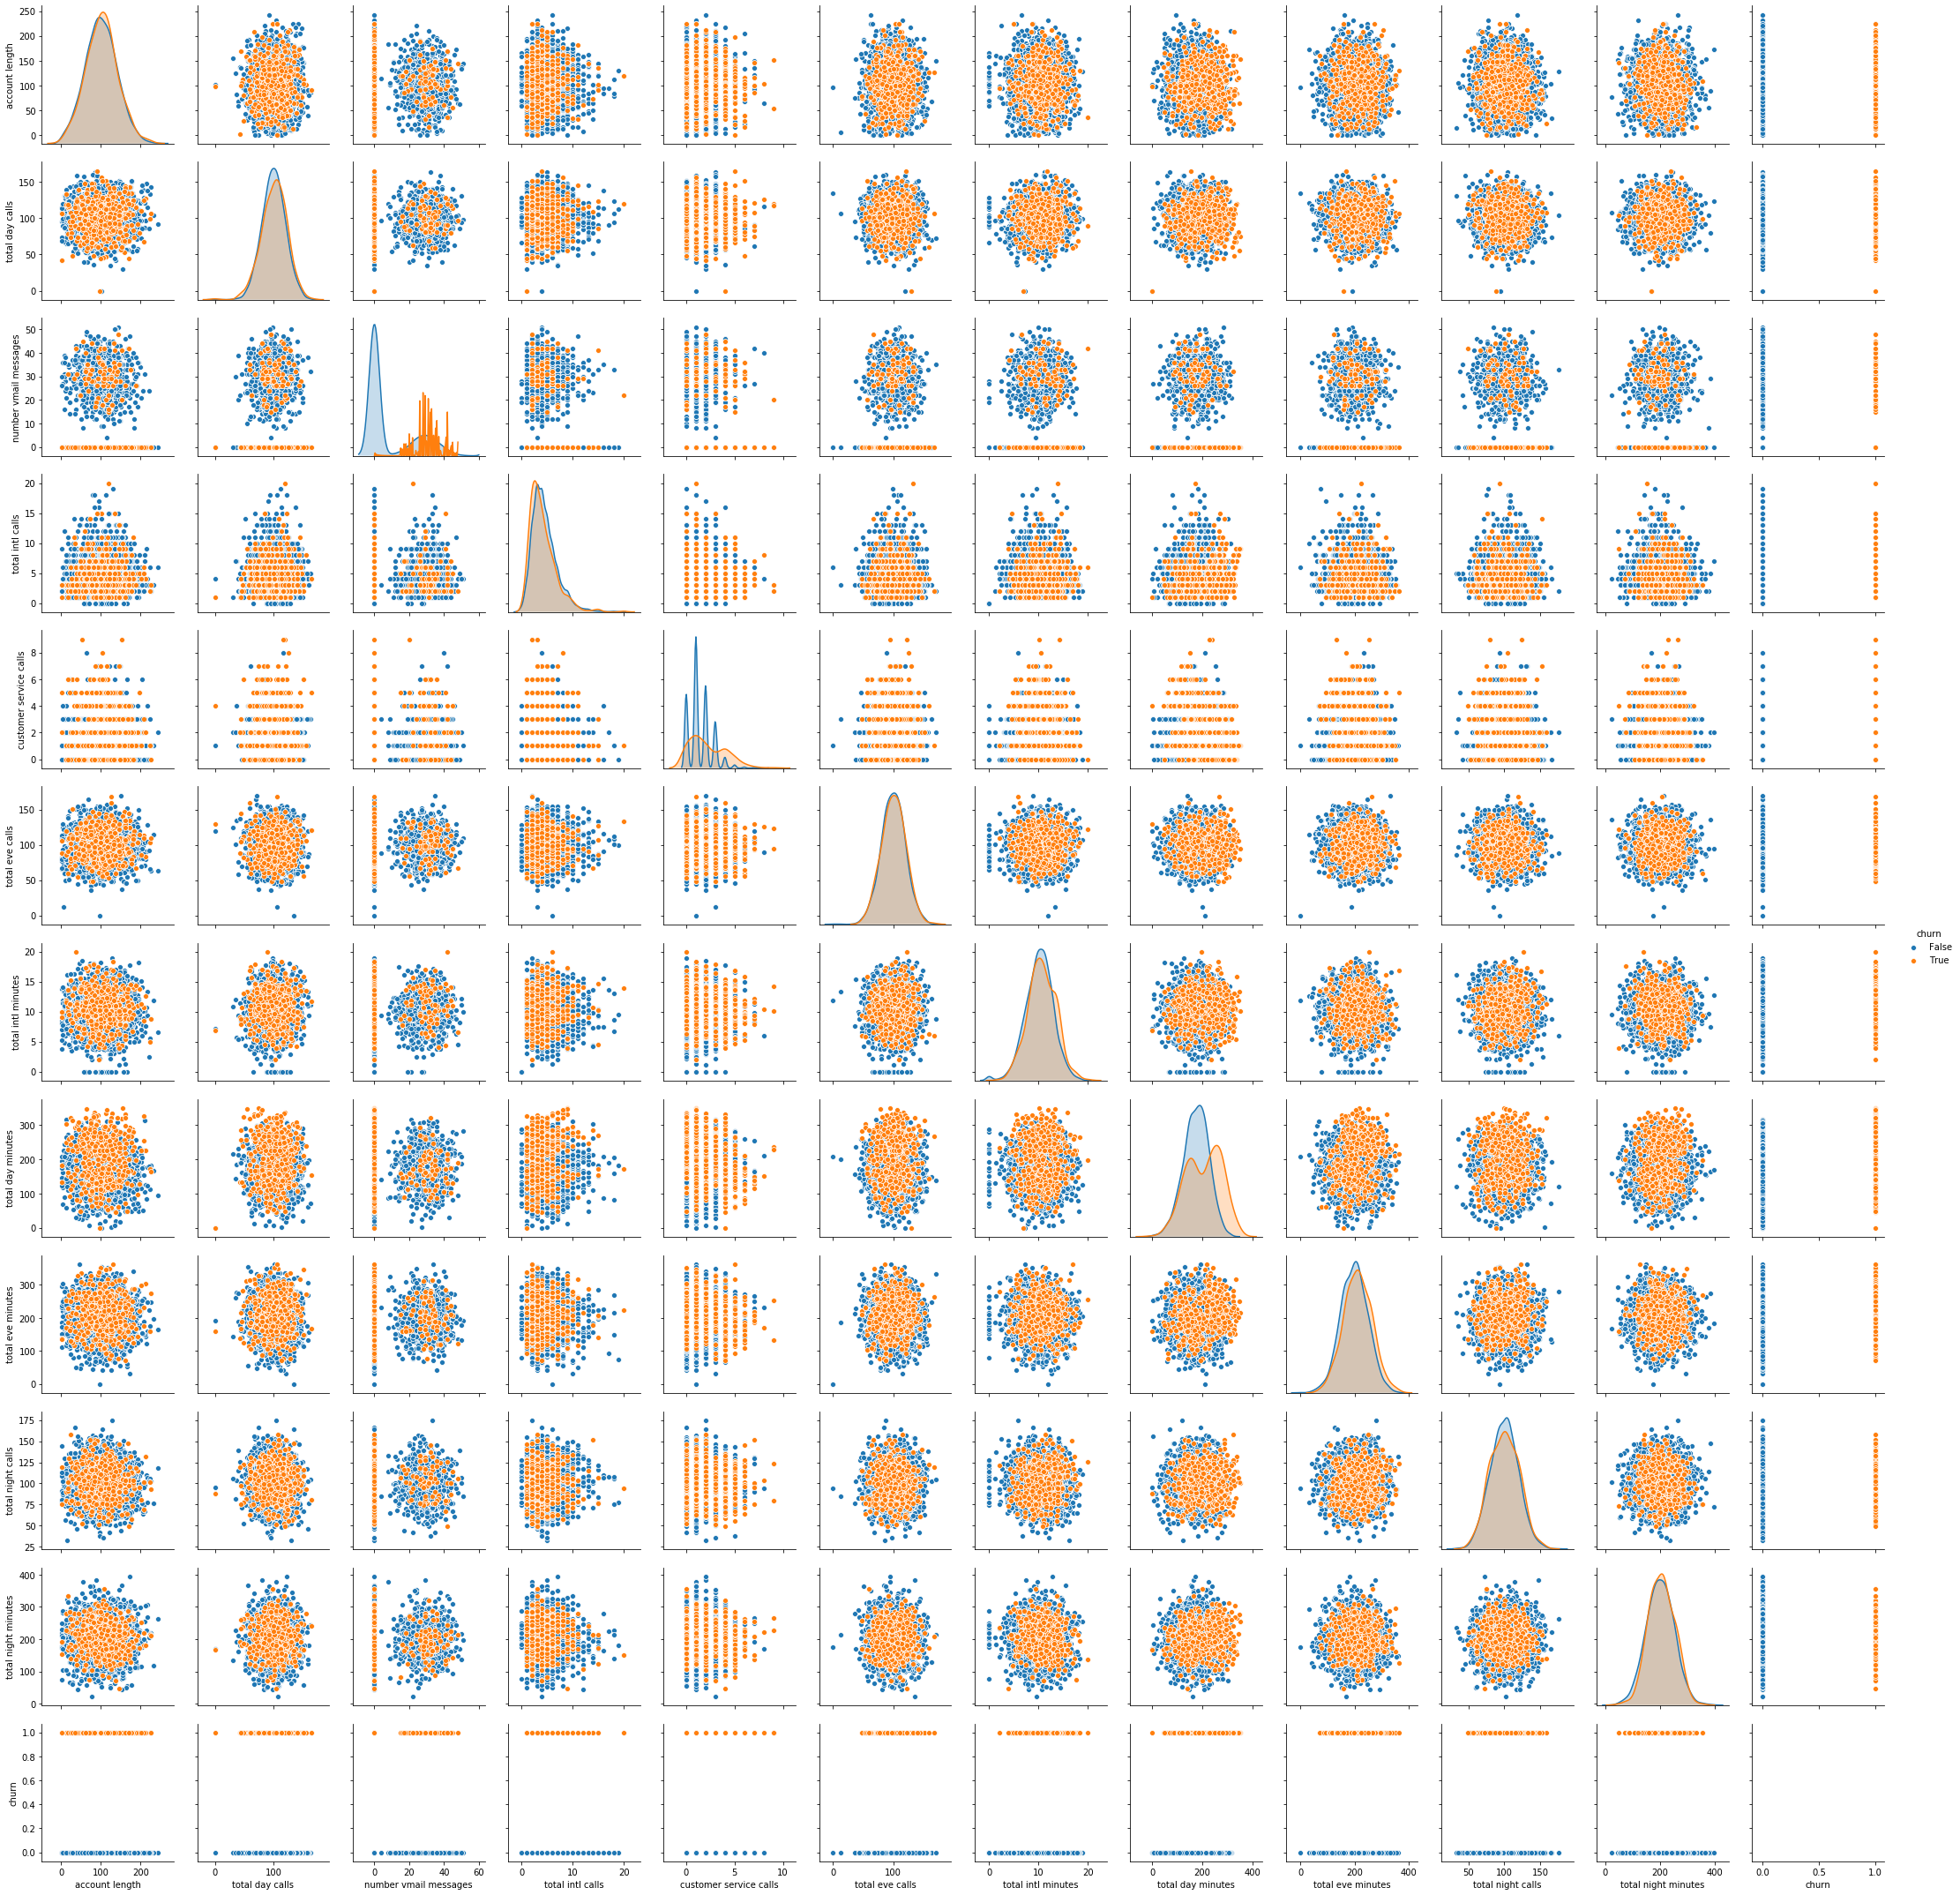

In [51]:
sns.pairplot(df[features + ['churn']], hue='churn')

In [52]:
# Давайте посмотрим, как входные переменные связаны с целевой переменной Churn.
# Ранее вы узнали о точечных графиках. Кроме того, их точки могут иметь цветовую или размерную кодировку, 
# так что значения третьей категориальной переменной также представлены на том же рисунке. 
# Мы можем достичь этого с помощью функции scatter (), показанной выше, 
# но давайте попробуем новую функцию с именем lmplot () и используем параметр hue, 
# чтобы указать интересующую нас категориальную особенность:

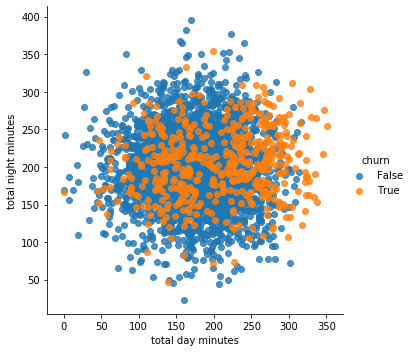

In [53]:
sns.lmplot('total day minutes', 'total night minutes', data=df, 
           hue='churn', fit_reg=False);

In [54]:
# Построим boxplot-ы, описывающее статистики распределения количественных признаков в двух группах: 
# среди лояльных и ушедших клиентов.

In [55]:
# sns.boxplot?

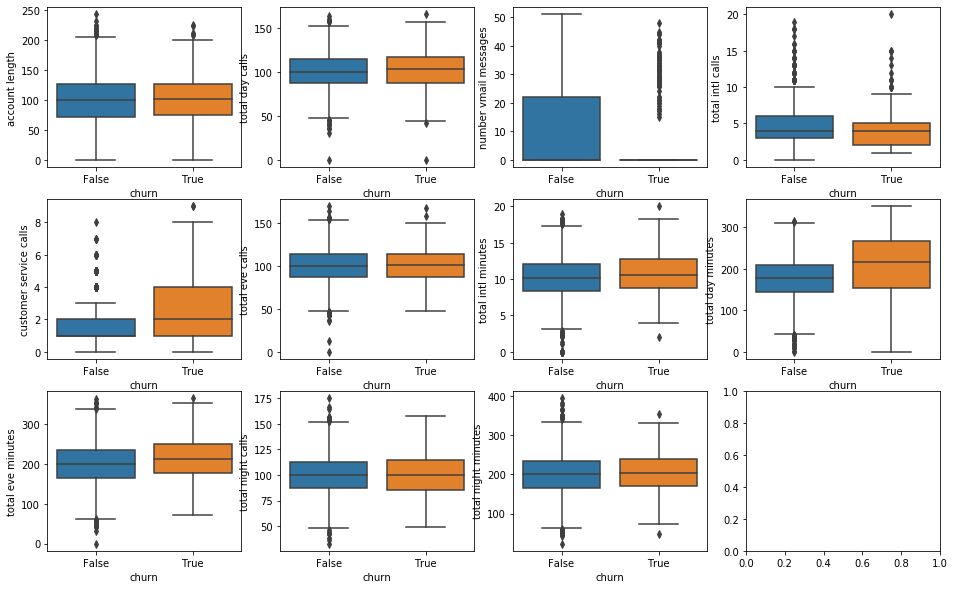

In [62]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 10))

for idx, feat in  enumerate(features):
    sns.boxplot(x='churn', y=feat, data=df, ax=axes[idx // 4, idx % 4])
    # axes[idx // 4, idx % 4].legend()
    axes[idx // 4, idx % 4].set_xlabel('churn')
    axes[idx // 4, idx % 4].set_ylabel(feat);

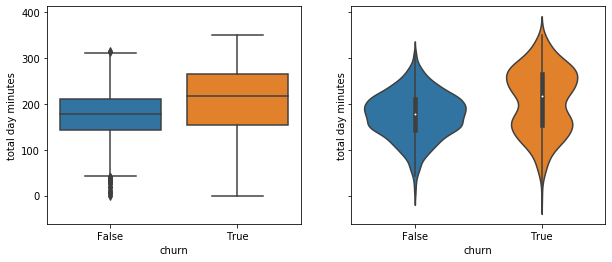

In [57]:
# Посмотрим отдельно на картинки с распределением кол-ва проговоренных днем минут среди лояльных/ушедших. 
# Слева — знакомые нам боксплоты, справа – сглаженные гистограммы распределения числового признака в двух группах 

# Интересное наблюдение: в среднем ушедшие клиенты больше пользуются связью. Возможно, они недовольны тарифами, 
# и одной из мер борьбы с оттоком будет понижение тарифных ставок (стоимости мобильной связи). 
# Но это уже компании надо будет проводить дополнительный экономический анализ, действительно ли такие меры будут оправданы.


_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4)) 
sns.boxplot(x='churn', y='total day minutes',
            data=df, ax=axes[0]);
sns.violinplot(x='churn', y='total day minutes', 
               data=df, ax=axes[1]);

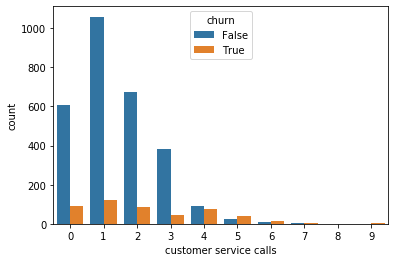

In [58]:
# Теперь изобразим распределение числа обращений в сервисный центр. 
# Тут уникальных значений признака не много (признак можно считать как количественным целочисленным, так и порядковым), 
# и наглядней изобразить распределение с помощью countplot. 
# Наблюдение: доля оттока сильно возрастает начиная с 4 звонков в сервисный центр.

sns.countplot(x='customer service calls', hue='churn', data=df);

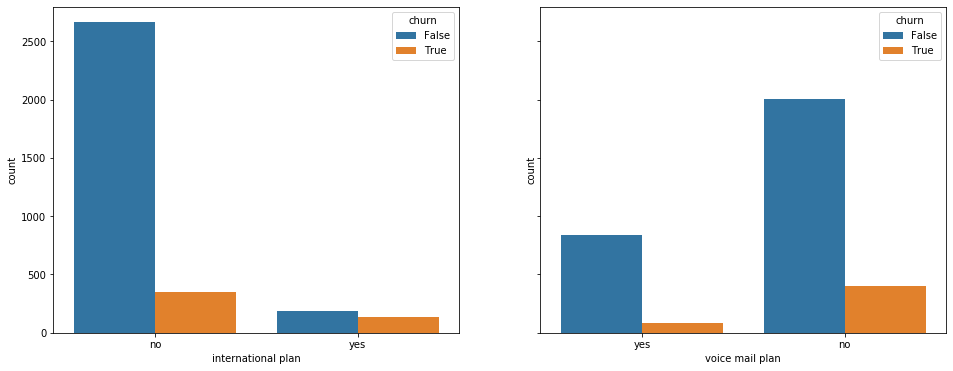

In [59]:
# Теперь посмотрим на связь бинарных признаков International plan и Voice mail plan с оттоком. 
# Наблюдение: когда роуминг подключен, доля оттока намного выше, т.е. наличие международного роуминга – сильный признак. 
# Про голосовую почту такого нельзя сказать.

_, axes = plt.subplots(1, 2, sharey=True, figsize=(16,6))

sns.countplot(x='international plan', hue='churn', data=df, ax=axes[0]);
sns.countplot(x='voice mail plan', hue='churn', data=df, ax=axes[1]);

In [60]:
# Посмотрим, как с оттоком связан категориальный признак State. 
# С ним уже не так приятно работать, поскольку число уникальных штатов довольно велико – 51. 
# Можно в начале построить сводную табличку или посчитать процент оттока для каждого штата. 
# Но данных по каждом штату по отдельности мало (ушедших клиентов всего от 3 до 17 в каждом штате), 
# поэтому, возможно, признак State впоследствии не стоит добавлять в модели классификации из-за риска переобучения 
# (но мы это будем проверять на кросс-валидации, stay tuned!).

df.groupby(['state'])['churn'].agg([np.mean]).sort_values(by='mean', ascending=False).T

state,NJ,CA,TX,MD,SC,MI,MS,NV,WA,ME,...,RI,WI,IL,NE,LA,IA,VA,AZ,AK,HI
mean,0.264706,0.264706,0.25,0.242857,0.233333,0.219178,0.215385,0.212121,0.212121,0.209677,...,0.092308,0.089744,0.086207,0.081967,0.078431,0.068182,0.064935,0.0625,0.057692,0.056604


In [61]:
# Видно, что в Нью-Джерси и Калифорнии доля оттока выше 25%, а на Гавайях и в Аляске меньше 5%. 
# Но эти выводы построены на слишком скромной статистике и возможно, это просто особенности имеющихся данных.